<a href="https://colab.research.google.com/github/JBdama/WLEDxSignalRGB/blob/main/DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

# Introduction

##Objective:

The main goal of this project is to predict the possibility of dropped out students in their higher education. Accurately predicting and understanding the factors that contribute to student success can have far-reaching implications, from improving academic support systems to optimizing resource allocation and enhancing the overall student experience.

##Dataset Introduction


##Problem statement

Lots of things that influence a drop-out. Deciding on the most important features for the classification.
Problem
Classifier to be used
Challenges in preprocessing
Performance objectives

##Preprocessing

There has already been preprocessing on this dataset. There are no missing values and outliers have been removed




# Exploratory Data Analysis

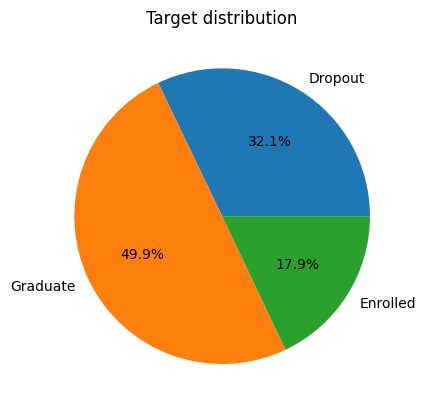

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

dataset_fetched = fetch_ucirepo(id=697)

features = dataset_fetched.data.features
targets = dataset_fetched.data.targets

target_types = ["Dropout", "Graduate", "Enrolled"]
# General grouping
dropouts_indices = targets[targets["Target"] == target_types[0]]
graduates_indices = targets[targets["Target"] == target_types[1]]
students_indices = targets[targets["Target"] == target_types[2]]

dropouts = features.iloc[dropouts_indices.index]
graduates = features.iloc[graduates_indices.index]
students = features.iloc[students_indices.index]

amount = [dropouts.shape[0], graduates.shape[0], students.shape[0]]
fig, ax = plt.subplots()
ax.title.set_text("Target distribution")
ax.pie(amount, labels=target_types, autopct='%1.1f%%')
fig.show()

In [ ]:
# New Feature:
# Number of curricular units enrolled but not credited
enrolled = features['Curricular units 1st sem (enrolled)']
credited = features['Curricular units 1st sem (credited)']
approved = features['Curricular units 1st sem (approved)']
features['Curricular units 1st sem (not approved)'] = enrolled - approved

# features['Curricular units 2nd sem (not credited)'] = approved - credited
enrolled = features['Curricular units 2nd sem (enrolled)']
credited = features['Curricular units 2nd sem (credited)']
approved = features['Curricular units 2nd sem (approved)']

features['Curricular units 2nd sem (not approved)'] = enrolled - approved



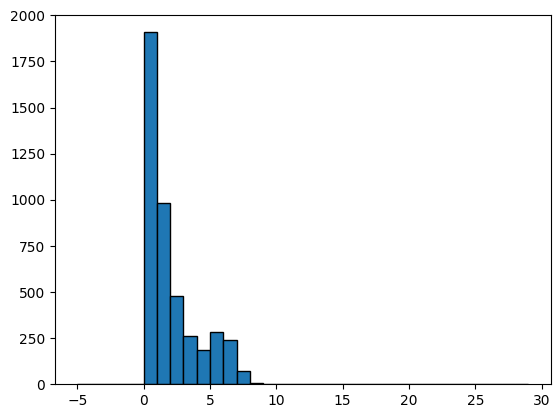

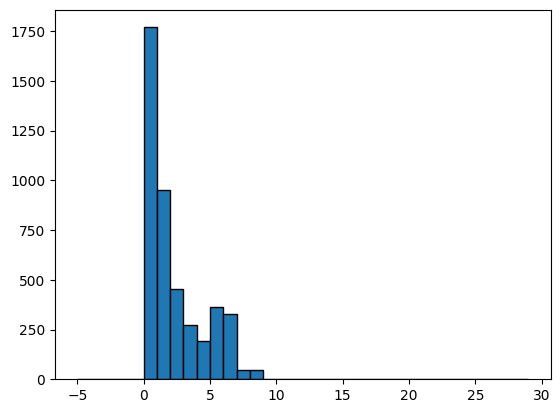

In [ ]:
min = -5
max = 30
feature_to_sort_by = "Curricular units 1st sem (not approved)"
featured = features[feature_to_sort_by]
plt.hist(featured, bins=range(min, max), edgecolor='black')
plt.show()

feature_to_sort_by = "Curricular units 2nd sem (not approved)"
featured = features[feature_to_sort_by]
plt.hist(featured, bins=range(min, max), edgecolor='black')
plt.show()

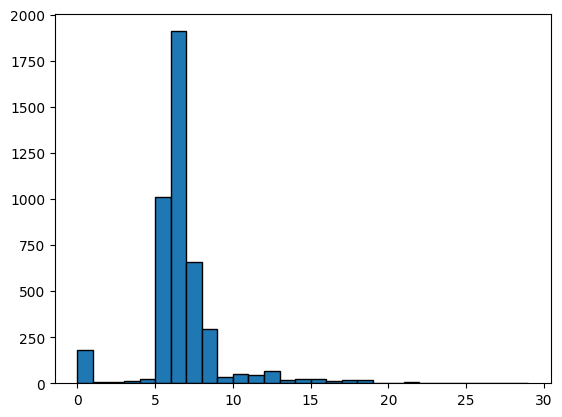

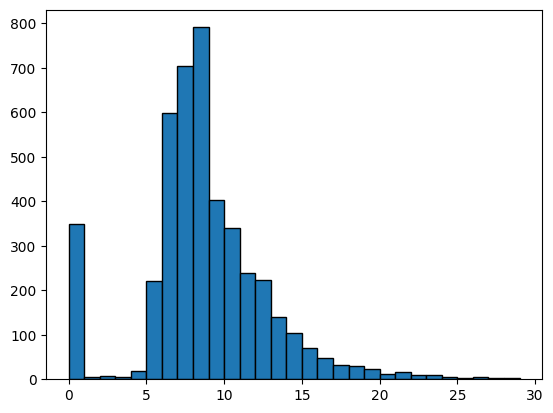

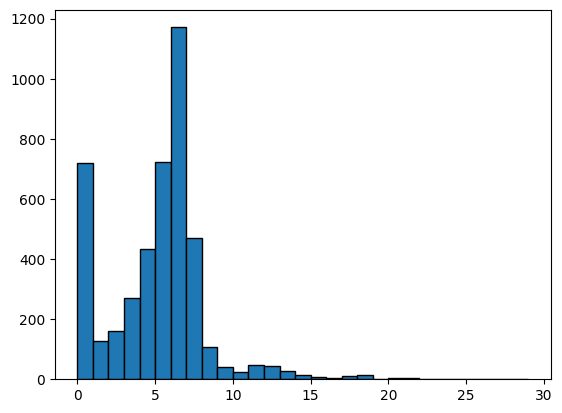

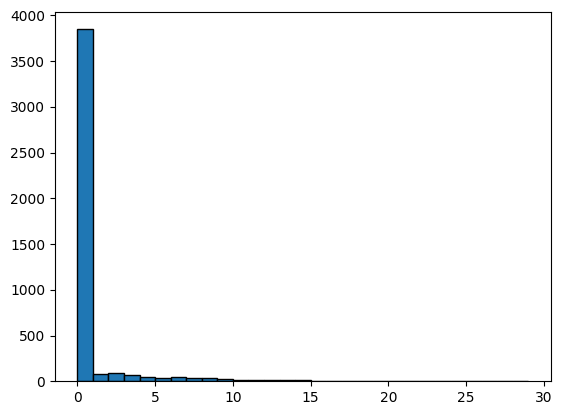

In [ ]:
#sampler:
min = 0
max = 30

feature_to_sort_by = "Curricular units 1st sem (enrolled)"
featured = features[feature_to_sort_by]
plt.hist(featured, bins=range(min, max), edgecolor='black')
plt.show()

feature_to_sort_by = "Curricular units 1st sem (evaluations)"
featured = features[feature_to_sort_by]
plt.hist(featured, bins=range(min, max), edgecolor='black')
plt.show()

feature_to_sort_by = "Curricular units 1st sem (approved)"
featured = features[feature_to_sort_by]
plt.hist(featured, bins=range(min, max), edgecolor='black')
plt.show()

feature_to_sort_by = "Curricular units 1st sem (credited)"
featured = features[feature_to_sort_by]
plt.hist(featured, bins=range(min, max), edgecolor='black')
plt.show()

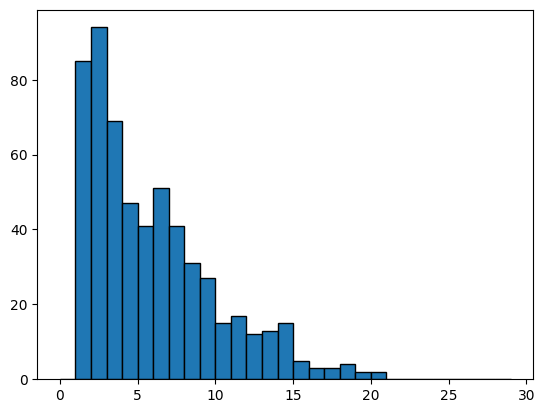

[179, 301, 97]


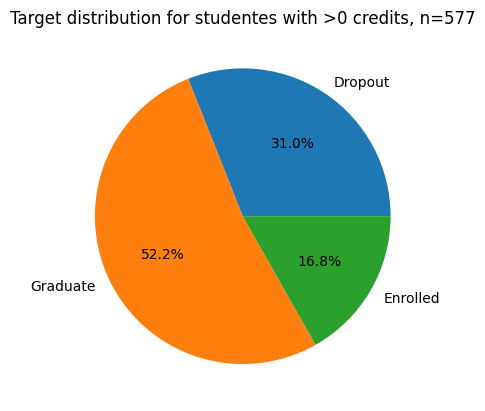

[1242, 1908, 697]


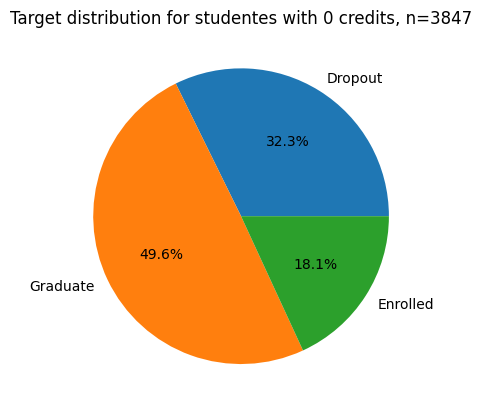

In [ ]:
# Target distribution for students who got at least one credit in 1st semester
min = 0
max = 30
feature_to_sort_by = "Curricular units 1st sem (credited)"
featured = features[feature_to_sort_by]
featured = featured[featured > 0]

plt.hist(featured, bins=range(min, max), edgecolor='black')
plt.show()

dropout = dropouts.index.intersection(featured.index)
grad = graduates.index.intersection(featured.index)
student = students.index.intersection(featured.index)

amount = [dropout.shape[0], grad.shape[0], student.shape[0]]
print(amount)
fig, ax = plt.subplots()
ax.title.set_text(f"Target distribution for studentes with >0 credits, n={sum(amount)}")
ax.pie(amount, labels=target_types, autopct='%1.1f%%')
plt.show()

# Versus students with 0 credit points
featured = features[feature_to_sort_by]
featured = featured[featured == 0]


dropout = dropouts.index.intersection(featured.index)
grad = graduates.index.intersection(featured.index)
student = students.index.intersection(featured.index)

amount = [dropout.shape[0], grad.shape[0], student.shape[0]]
print(amount)
fig, ax = plt.subplots()
ax.title.set_text(f"Target distribution for studentes with 0 credits, n={sum(amount)}")
ax.pie(amount, labels=target_types, autopct='%1.1f%%')
fig.show()

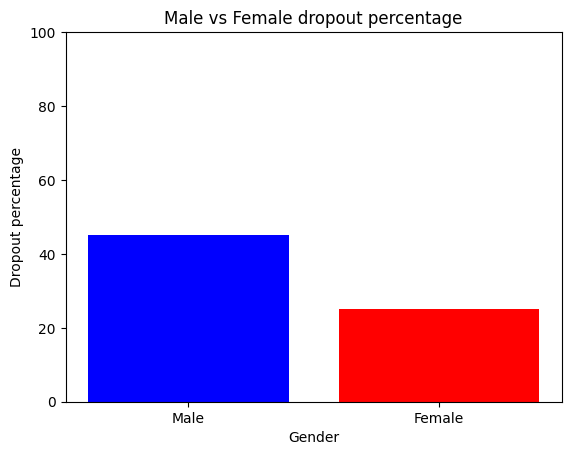

In [ ]:
# Dropout male vs female
males = features[features["Gender"] == 1]  # 1 is male, 0 is female
females = features[features["Gender"] == 0]

dropouts = targets[targets["Target"] == "Dropout"]

male_dropout_indices = males.index.intersection(dropouts.index)
female_dropout_indices = females.index.intersection(dropouts.index)

male_dropout = len(male_dropout_indices) / males.shape[0] * 100
female_dropout = len(female_dropout_indices) / females.shape[0] * 100

plt.title("Male vs Female dropout percentage")
plt.ylim(0, 100)
plt.xlabel("Gender")
plt.ylabel("Dropout percentage")
plt.bar(["Male", "Female"], [male_dropout, female_dropout], color=["blue", "red"])
plt.show()

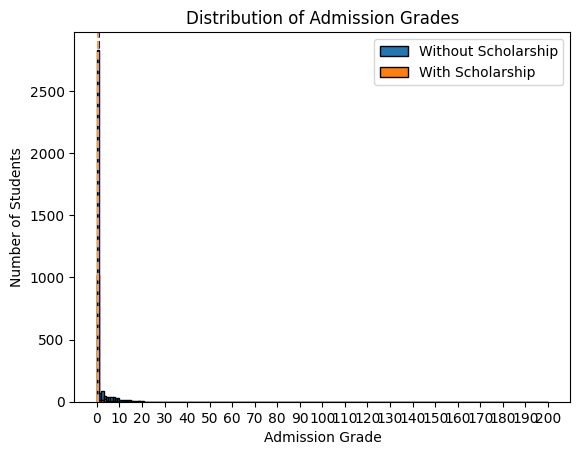

In [ ]:
# Admission Grades
feature_to_sort_by = "Curricular units 1st sem (credited)"

without_scolar = features[features["Scholarship holder"] == 0]
with_scolar = features[features["Scholarship holder"] == 1]

grades_without_scholar = without_scolar[feature_to_sort_by]
grades_with_scholar = with_scolar[feature_to_sort_by]

mean_without_scholar = grades_without_scholar.mean()
mean_with_scholar = grades_with_scholar.mean()

plt.hist(grades_without_scholar, bins=range(0, 201), edgecolor='black', label="Without Scholarship")
plt.hist(grades_with_scholar, bins=range(0, 201), edgecolor='black', label="With Scholarship")
plt.legend()
plt.axvline(mean_without_scholar, color='blue', linestyle='--', label="Mean without Scholarship")
plt.axvline(mean_with_scholar, color='orange', linestyle='--', label="Mean with Scholarship")
plt.xlabel('Admission Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of Admission Grades')
plt.xticks(range(0, 201, 10))  # Set x-ticks at intervals of 10
# plt.xlim(90, 200)
# plt.grid(True)
plt.show()

Es sind 35.171790235081374% Frauen
Durchschnittsalter: 23.265144665461122


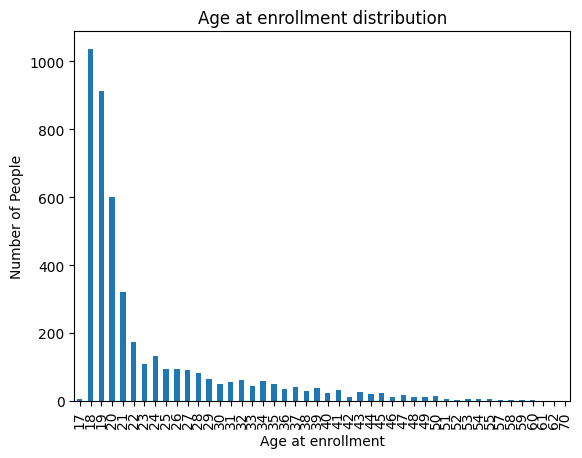

In [ ]:
# data (as pandas dataframes)
x = features
y = targets

genders = x["Gender"]
# metadata
age = x["Age at enrollment"]
# print(x["Gender"])
print(f"Es sind {genders.mean()*100}% Frauen")
print(f"Durchschnittsalter: {age.mean()}")

age_counts = age.value_counts().sort_index()
age_counts.plot(kind="bar")
plt.ylabel("Number of People")
plt.title("Age at enrollment distribution")
plt.show()

# Now filter by target


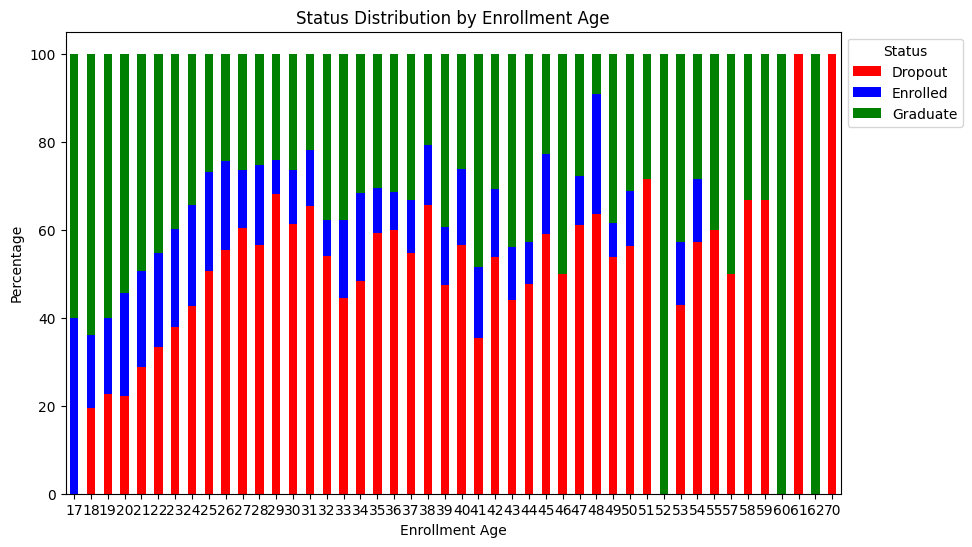

In [ ]:
# Merge features and targets on index
data = features.merge(targets, left_index=True, right_index=True)

# Group by Enrollment_Age and Target, then count
status_counts = data.groupby(['Age at enrollment', 'Target']).size().unstack(fill_value=0)

# Calculate percentages
status_percentages = status_counts.div(status_counts.sum(axis=1), axis=0) * 100

# Plotting
status_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])

# Add labels and title
plt.xlabel('Enrollment Age')
plt.ylabel('Percentage')
plt.title('Status Distribution by Enrollment Age')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)  # Ensure x-ticks are not rotated
plt.show()

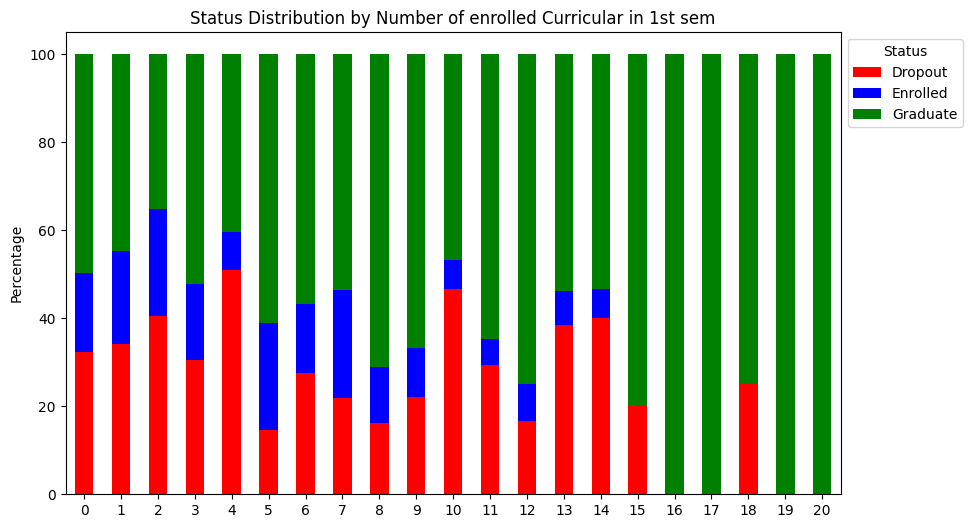

In [ ]:
status_counts = data.groupby(['Curricular units 1st sem (credited)', 'Target']).size().unstack(fill_value=0)

# Calculate percentages
status_percentages = status_counts.div(status_counts.sum(axis=1), axis=0) * 100

# Plotting
status_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])

# Add labels and title
plt.xlabel('')
plt.ylabel('Percentage')
plt.title('Status Distribution by Number of enrolled Curricular in 1st sem')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)  # Ensure x-ticks are not rotated
plt.show()

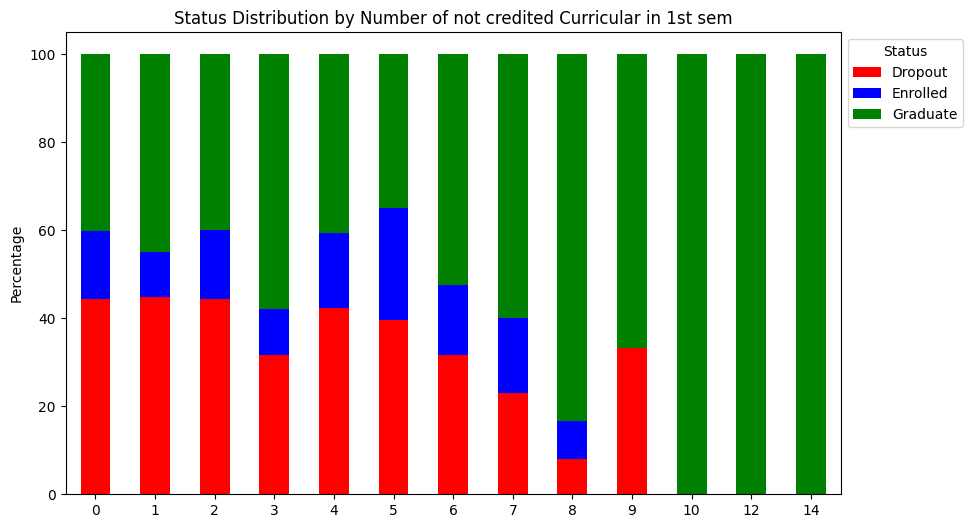

In [ ]:
status_counts = data.groupby(['Curricular units 1st sem (not credited)', 'Target']).size().unstack(fill_value=0)

# Calculate percentages
status_percentages = status_counts.div(status_counts.sum(axis=1), axis=0) * 100

# Plotting
status_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])

# Add labels and title
plt.xlabel('')
plt.ylabel('Percentage')
plt.title('Status Distribution by Number of not credited Curricular in 1st sem')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)  # Ensure x-ticks are not rotated
plt.show()

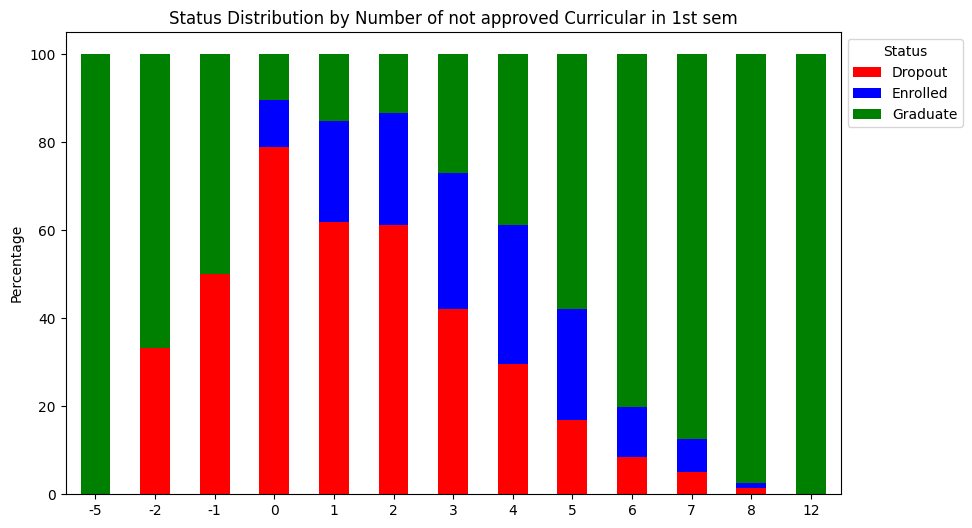

In [ ]:
status_counts = data.groupby(['Curricular units 1st sem (not approved)', 'Target']).size().unstack(fill_value=0)

# Calculate percentages
status_percentages = status_counts.div(status_counts.sum(axis=1), axis=0) * 100

# Plotting
status_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])

# Add labels and title
plt.xlabel('')
plt.ylabel('Percentage')
plt.title('Status Distribution by Number of not approved Curricular in 1st sem')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)  # Ensure x-ticks are not rotated
plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame()

print(df)

print("test")

Empty DataFrame
Columns: []
Index: []
test


Can you see this?



*   Listeneintrag
*   Listeneintrag



```
# This is formatted as code
```

